In [1]:
# !pip install plotly
# !pip install "notebook>=5.3" "ipywidgets>=7.5"
# !pip install geopandas
# !pip install py7zr

In [2]:
import pandas as pd
import numpy as np
import config
import datetime
from sqlalchemy import text
import plotly
import plotly.express as px
import ipywidgets
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import geopandas as gpd
print(config.version)
print(config.connection_string)
print(plotly.__version__, ipywidgets.__version__)
pd.set_option('display.max_columns', None)

3.2.0.Dev
postgresql://postgres:sa@localhost/icip
6.3.1 8.1.7


In [4]:
# https://plotly.com/python/#maps

In [5]:
# demo express

Index(['cleabs', 'code_insee', 'nom_commune', 'iris', 'code_iris', 'nom_iris',
       'type_iris', 'geometry'],
      dtype='object')
EPSG:2154
687      60881800.0
734      60883000.0
2597     60880100.0
4458     60880104.0
5715     60880104.0
            ...    
14763    60883500.0
14773    60883600.0
14774    60883600.0
14786    60883700.0
14798    60883800.0
Name: code_iris, Length: 146, dtype: float32


C:\Users\conta\AppData\Local\Temp\ipykernel_52584\3262975146.py:25: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\conta\AppData\Local\Temp\ipykernel_52584\3262975146.py:26: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




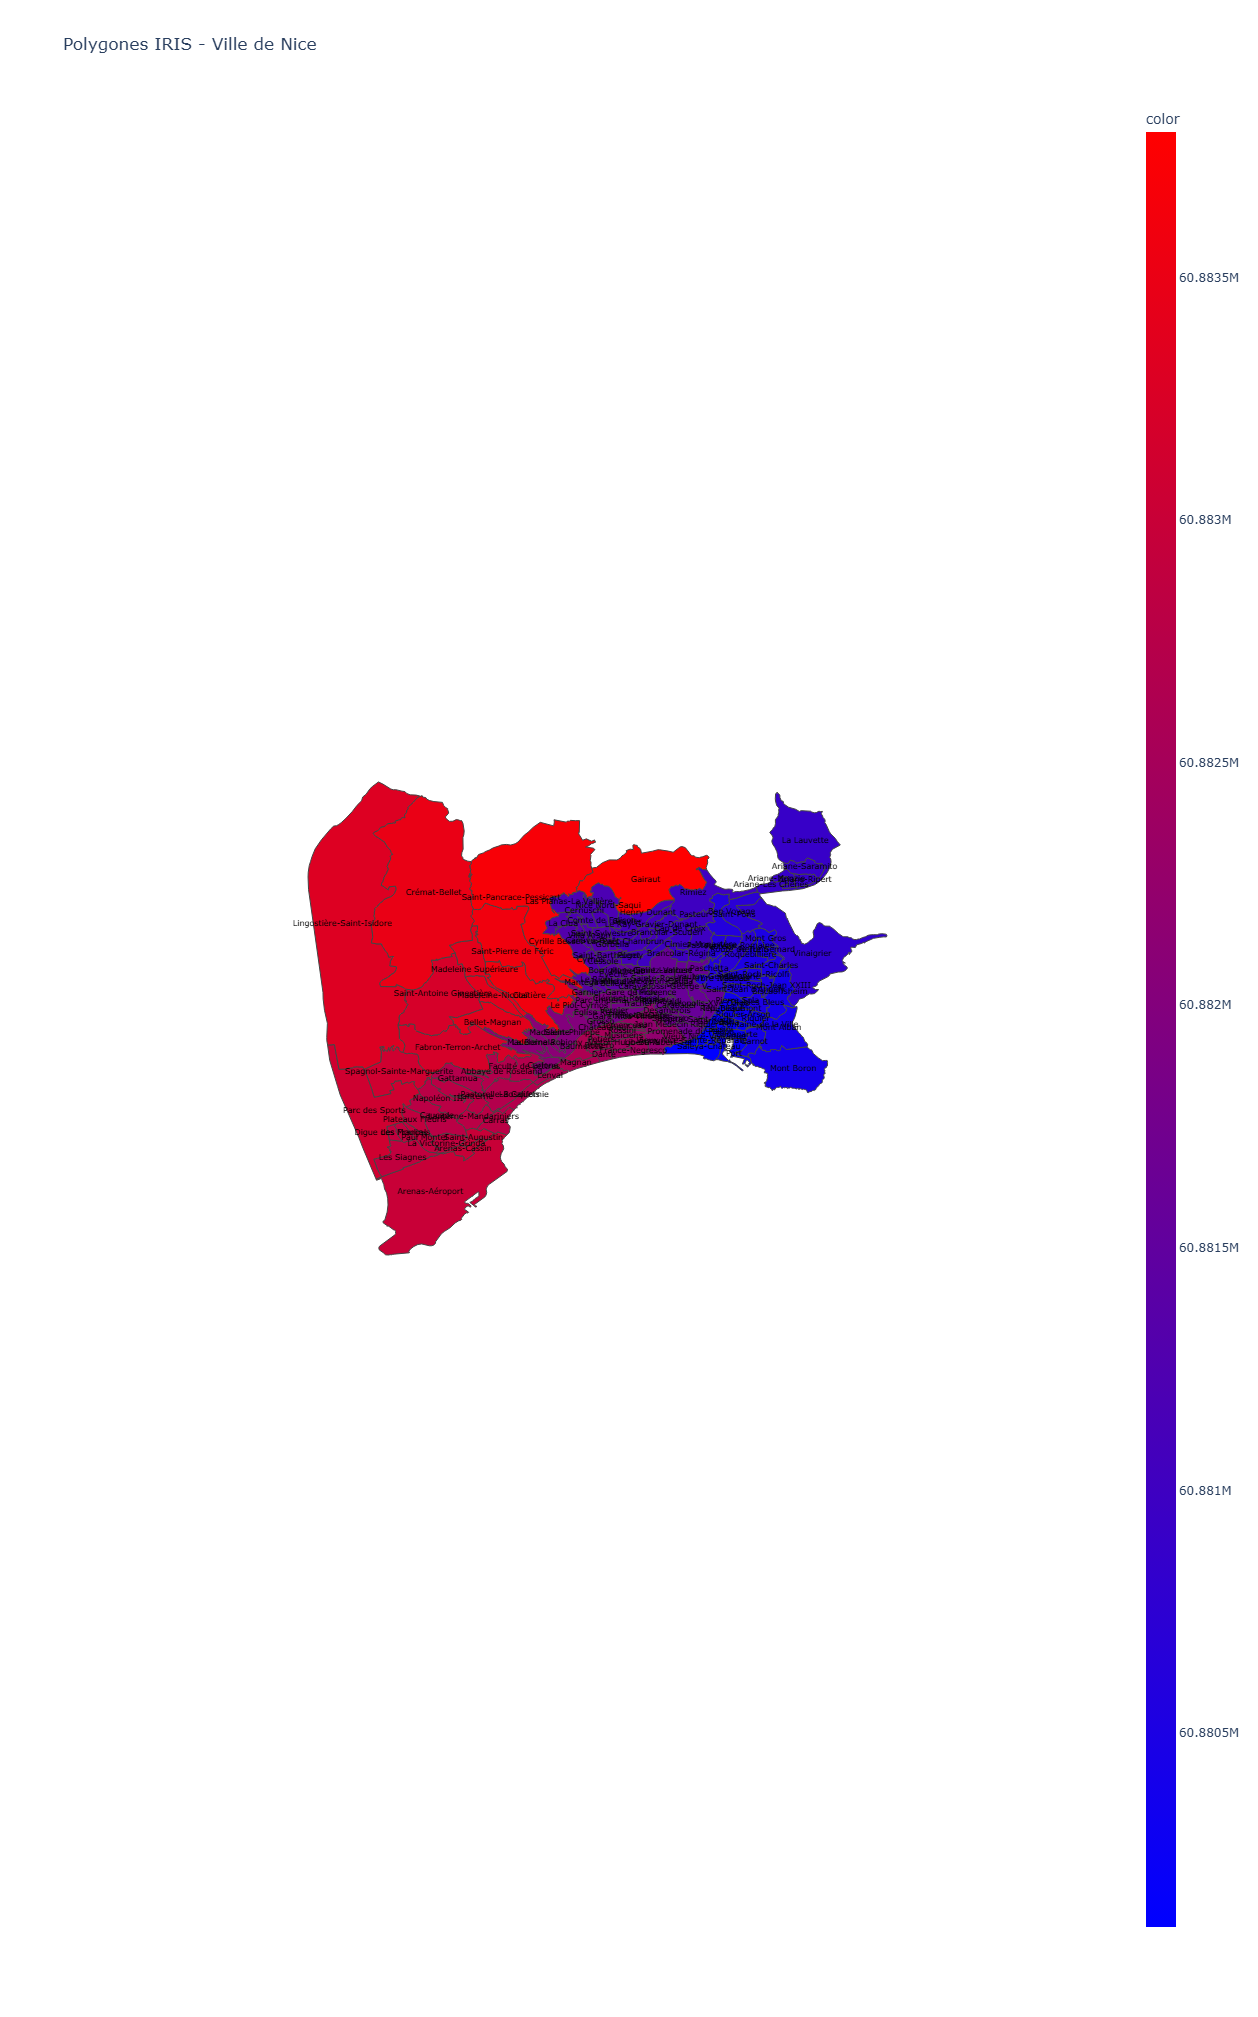

In [43]:
# Charger le fichier GeoPackage
fichier_gpkg = "contours-iris.gpkg"
gdf = gpd.read_file(fichier_gpkg)
print(gdf.columns)

# Filtrer pour Nice
gdf_nice = gdf[gdf["nom_commune"].str.lower() == "nice"]

# Convertir en WGS84
print(gdf_nice.crs)
gdf_nice = gdf_nice.to_crs(epsg=4326)
print(gdf_nice["code_iris"].astype(np.float32))
# Créer le GeoJSON
geojson_data = gdf_nice.__geo_interface__

gdf_nice["fid"]=gdf_nice.index

fig = px.choropleth(
    gdf_nice,
    geojson=geojson_data,
    locations=gdf_nice["fid"],
    color=gdf_nice["code_iris"].astype(np.float32),
    color_continuous_scale="Bluered",
    center={
        "lat": gdf_nice.geometry.centroid.y.mean(),
        "lon": gdf_nice.geometry.centroid.x.mean()
    },
    # zoom=11,
    title="Polygones IRIS - Ville de Nice",
    height=2000,  # ✅ Augmente la hauteur
    width=2000,   # ✅ Augmente la largeur
    # opacity=1,
    hover_name="nom_iris",  # Titre dans le hover
    hover_data={
        "code_iris": True,
        "nom_iris": False,
        "type_iris": True,
        "cleabs": True,
        "fid": False,
    },

)

# fig.update_geos(fitbounds="locations", visible=False)




gdf_nice_l93 = gdf_nice.to_crs(2154)
pts_l93 = gdf_nice_l93.geometry.representative_point()
pts = pts_l93.to_crs(4326)  # lon/lat

fig.add_trace(
    go.Scattergeo(
        lon=pts.x,
        lat=pts.y,
        text=gdf_nice["nom_iris"].astype(str),
        mode="text",
        textfont=dict(color="black", size=8),
        hoverinfo="skip",        # on garde le hover de la choropleth
        showlegend=False,
        textposition="middle center",
    )
)

fig.update_geos(
    fitbounds="locations",
    visible=False,  
    showcountries=False,
    showland=False,
    showocean=False,
    showlakes=False,
    showrivers=False,
)

fig.update_layout(
    autosize=True
)


fig.show()
